In [18]:
import pandas as pd 

df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#"], errors='ignore')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## Summary and Statistics

In [19]:
print("Descriptive Statistics:\n")
df.describe()

Descriptive Statistics:



,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [20]:
type_1_stats = df.groupby("Type 1").mean(numeric_only=True)
print("Average Statistics by Type 1:\n")
print(type_1_stats)

Average Statistics by Type 1:

               Total         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type 1                                                                          
Bug       378.927536  56.884058   70.971014   70.724638  53.869565  64.797101   
Dark      445.741935  66.806452   88.387097   70.225806  74.645161  69.516129   
Dragon    550.531250  83.312500  112.125000   86.375000  96.843750  88.843750   
Electric  443.409091  59.795455   69.090909   66.295455  90.022727  73.704545   
Fairy     413.176471  74.117647   61.529412   65.705882  78.529412  84.705882   
Fighting  416.444444  69.851852   96.777778   65.925926  53.111111  64.703704   
Fire      458.076923  69.903846   84.769231   67.769231  88.980769  72.211538   
Flying    485.000000  70.750000   78.750000   66.250000  94.250000  72.500000   
Ghost     439.562500  64.437500   73.781250   81.187500  79.343750  76.468750   
Grass     421.142857  67.271429   73.214286   70.800000  77.500000  70.428571 

In [21]:
type_2_stats = df.groupby("Type 2").mean(numeric_only=True)
print("Average Statistics by Type 2:\n")
print(type_2_stats)

Average Statistics by Type 2:

               Total         HP      Attack     Defense     Sp. Atk  \
Type 2                                                                
Bug       393.333333  53.333333   90.000000   80.000000   46.666667   
Dark      484.400000  75.550000  109.800000   72.050000   81.800000   
Dragon    526.166667  82.166667   94.444444   87.055556   98.500000   
Electric  455.333333  88.166667   72.666667   68.333333   81.166667   
Fairy     417.956522  64.304348   61.608696   73.869565   75.000000   
Fighting  525.846154  79.461538  112.846154   82.500000   81.269231   
Fire      506.250000  71.250000   81.250000   80.166667  110.416667   
Flying    452.546392  71.391753   80.288660   68.309278   75.628866   
Ghost     430.714286  59.142857   84.142857   82.285714   73.214286   
Grass     408.920000  62.640000   74.160000   80.120000   60.160000   
Ground    444.342857  77.228571   89.857143   90.314286   65.542857   
Ice       525.714286  90.000000   98.000000   

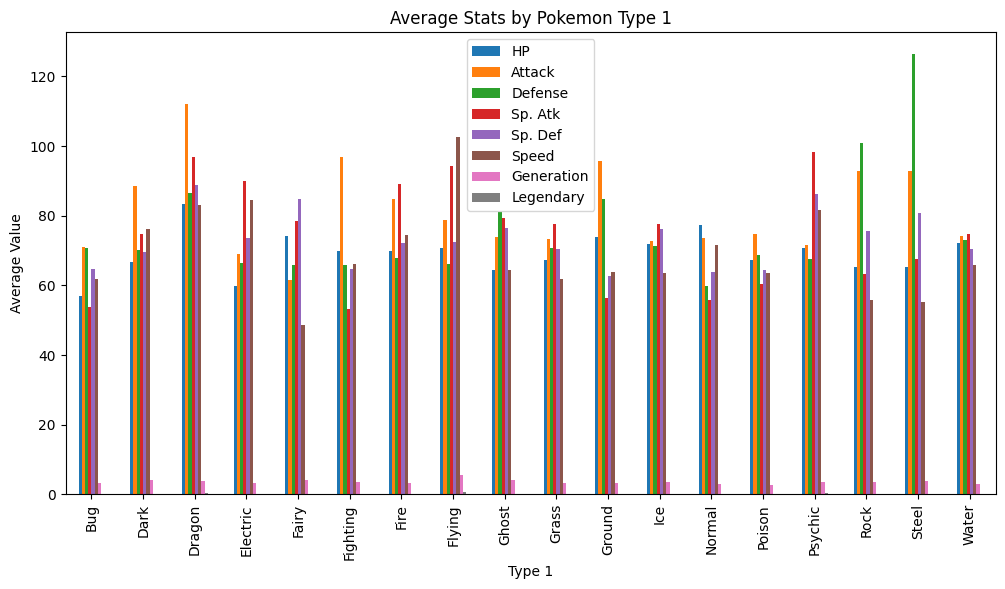

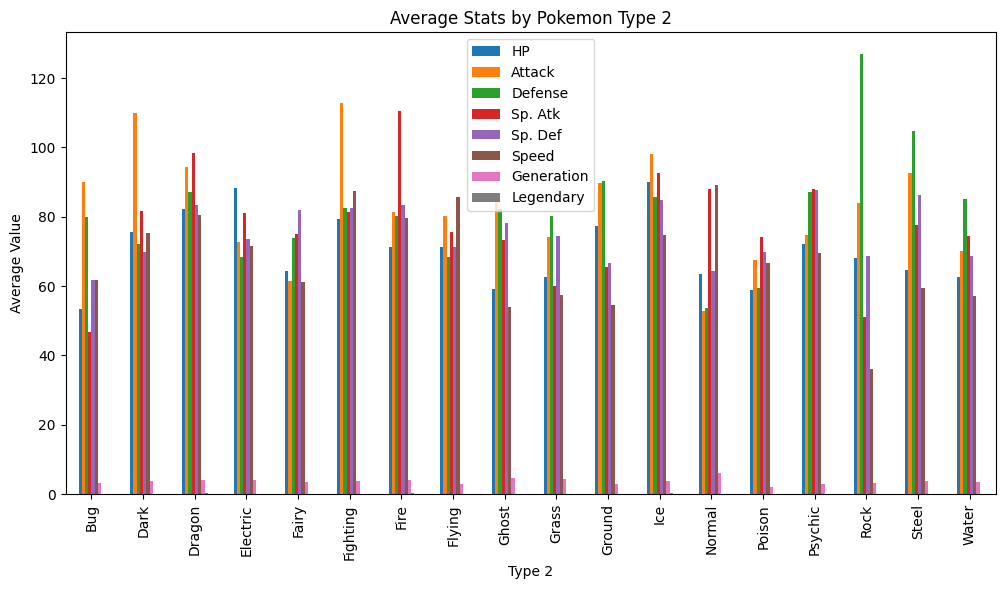

In [30]:
import matplotlib.pyplot as plt

type_1_stats = type_1_stats.drop(columns="Total", errors="ignore")

type_1_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Average Stats by Pokemon Type 1")
plt.ylabel("Average Value")
plt.show()

type_2_stats = type_2_stats.drop(columns="Total", errors="ignore")

type_2_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Average Stats by Pokemon Type 2")
plt.ylabel("Average Value")
plt.show()

## Correlation Analysis

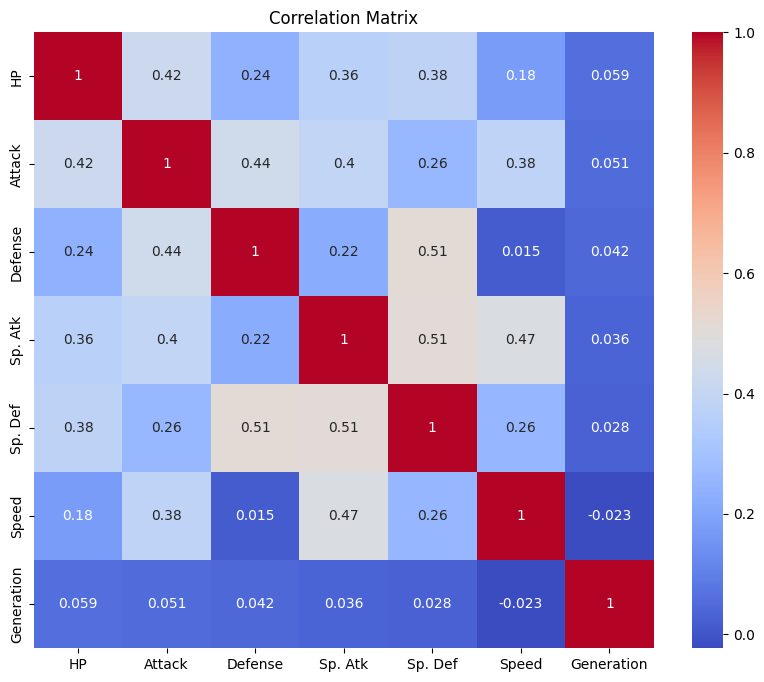

In [31]:
import seaborn as sns
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=["Total"])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [33]:
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]
print("Strong Correlations:\n", strong_correlations)

weak_correlations = correlation_matrix[abs(correlation_matrix) < 0.25]
print("Weak Correlations:\n", weak_correlations)

Strong Correlations:
              HP  Attack   Defense   Sp. Atk   Sp. Def  Speed  Generation
HP          1.0     NaN       NaN       NaN       NaN    NaN         NaN
Attack      NaN     1.0       NaN       NaN       NaN    NaN         NaN
Defense     NaN     NaN  1.000000       NaN  0.510747    NaN         NaN
Sp. Atk     NaN     NaN       NaN  1.000000  0.506121    NaN         NaN
Sp. Def     NaN     NaN  0.510747  0.506121  1.000000    NaN         NaN
Speed       NaN     NaN       NaN       NaN       NaN    1.0         NaN
Generation  NaN     NaN       NaN       NaN       NaN    NaN         1.0
Weak Correlations:
                   HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP               NaN       NaN  0.239622       NaN       NaN  0.175952   
Attack           NaN       NaN       NaN       NaN       NaN       NaN   
Defense     0.239622       NaN       NaN  0.223549       NaN  0.015227   
Sp. Atk          NaN       NaN  0.223549       NaN       NaN       NaN   
Sp. 

In [34]:
from scipy.stats import pearsonr

stat, p_value = pearsonr(df["Defense"], df["Sp. Def"])
print(f"Correlation between Defense and Sp. Def: r={stat}, p-value={p_value}")

stat, p_value = pearsonr(df["Sp. Atk"], df["Sp. Def"])
print(f"Correlation between Sp. Atk and Sp. Def: r={stat}, p-value={p_value}")

Correlation between Defense and Sp. Def: r=0.5107465890885576, p-value=2.3043081476066697e-54
Correlation between Sp. Atk and Sp. Def: r=0.5061214206155489, p-value=2.9212954967470726e-53


The p-value for both the correlation between Defense and Special Defence, and between Special Attack and Special Defense are <0.05. This implies that the correlations are statistically significant.

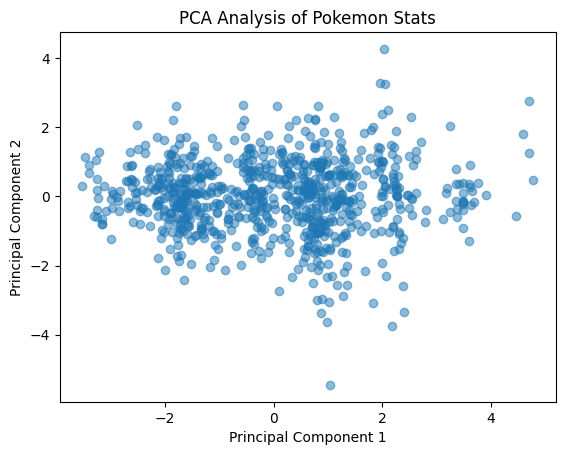

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Analysis of Pokemon Stats")
plt.show()

In a Pokemon battle, in the event of a player facing a much stronger Pokemon, they are better off picking a Defense-type Pokemon, as they tend to have Special Defense capabilities.This would allow the player to conserve their HP, and prolong the battle until the tides (possibly) turn in their favor.

Alternatively, if two Pokemon are evenly matched, a player should consider picking a Special Attack-type Pokemon, as it is likely to also have Special Defense capabilities. This would allow for both a strong offense and a strong defence, ensuring that even in the case of a large attack, the Pokemon may not lose a lot of HP.

## Data Visualization and Trend Analysis

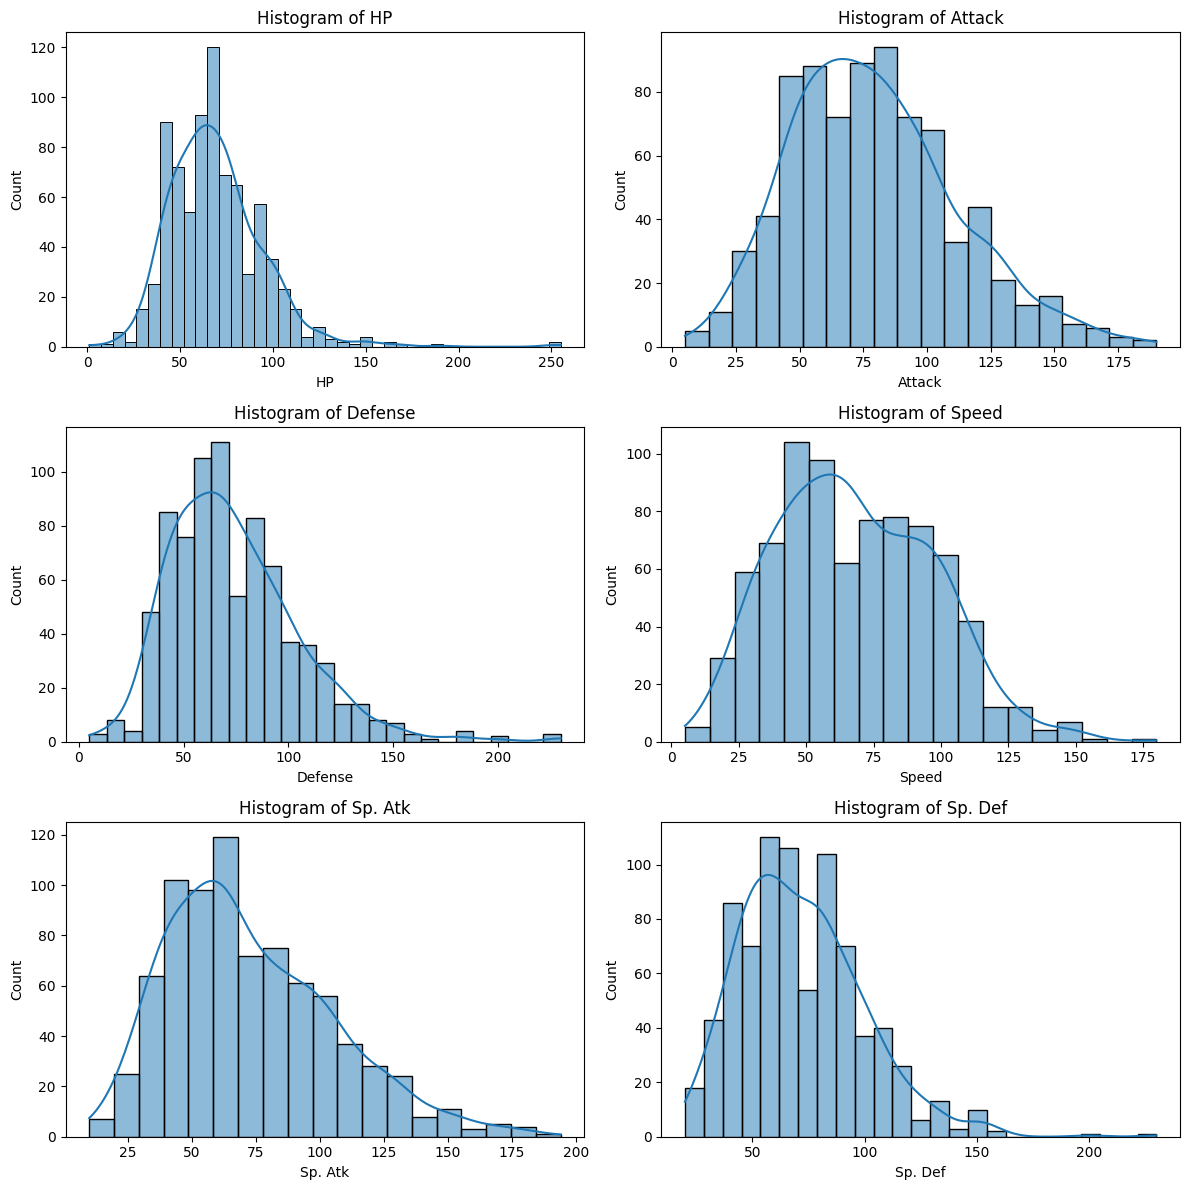

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns = ["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"]
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()
